# ПРОГНОЗИРОВАНИЕ №8 - ПРИБЫЛЬ

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcyo6tv54
  JVM stdout: /tmp/tmpcyo6tv54/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcyo6tv54/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_4iwuek
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8.csv'
df = h2o.import_file(file)
df = df.drop('C1')
df = df.drop('Revenue_cat')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegment
6111,31676.4,Natura,12,44,UrbanConvenience
92879,11020.6,Pirum,12,32,RuralProductivity
92879,11020.6,Pirum,12,31,RuralProductivity
32901,35010.4,VanArsdel,12,94,UrbanModeration
84770,16441.1,Currus,12,8,RuralSelect
95380,35541.4,Abbas,12,33,UrbanModeration
14559,2518.74,Natura,12,14,YouthYouth
16301,2518.74,Natura,12,14,YouthYouth
48439,9070.74,Quibus,12,4,RuralSelect
21787,28348.7,VanArsdel,12,70,UrbanModeration


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegment
6111,31676.4,Natura,12,44,UrbanConvenience
92879,11020.6,Pirum,12,32,RuralProductivity
32901,35010.4,VanArsdel,12,94,UrbanModeration
21787,28348.7,VanArsdel,12,70,UrbanModeration
7503,9058.14,Currus,12,5,MixAll Season
33126,26458.7,Natura,12,18,UrbanModeration
60073,10382.4,Natura,12,26,UrbanConvenience
6450,15113.7,Natura,12,10,UrbanModeration
32164,14615.4,Natura,12,10,UrbanModeration
60101,9002.7,Aliqui,12,5,UrbanExtreme


In [5]:
valid

Zip,Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegment
92879,11020.6,Pirum,12,31,RuralProductivity
84770,16441.1,Currus,12,8,RuralSelect
14559,2518.74,Natura,12,14,YouthYouth
16301,2518.74,Natura,12,14,YouthYouth
48439,9070.74,Quibus,12,4,RuralSelect
70578,6708.87,VanArsdel,12,69,UrbanConvenience
15955,9002.7,Aliqui,12,5,UrbanExtreme
94065,7049.7,Aliqui,12,6,UrbanExtreme
22302,12851.4,VanArsdel,12,54,UrbanModeration
78947,12851.4,VanArsdel,12,54,UrbanModeration


In [6]:
unseen

Zip,Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegment
95380,35541.4,Abbas,12,33,UrbanModeration
10032,9128.7,Aliqui,12,5,UrbanExtreme
30901,7238.7,Natura,12,36,UrbanExtreme
97140,6986.7,Aliqui,12,6,UrbanExtreme
48656,12851.4,VanArsdel,12,54,UrbanModeration
81506,12851.4,VanArsdel,12,54,UrbanModeration
92126,16442.4,VanArsdel,12,11,UrbanModeration
92562,16442.4,VanArsdel,12,11,UrbanModeration
51041,16316.4,VanArsdel,12,11,UrbanModeration
77469,16316.4,VanArsdel,12,11,UrbanModeration


In [7]:
y = "Revenue_T"
x=train.columns
x.remove(y)

# Тренировка модели

nfolds=0 - это отключает перексрестную проверку и точность будет проверятся на указанной валидационной выборке

In [8]:
aml = H2OAutoML(
    max_models = 10,
    seed = 1,
#    nfolds = 0 # отключение кросс валидации
)
aml.train(x = x, y = y, training_frame = train, validation_frame = valid)

AutoML progress: |
11:00:52.88: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230928_110052,1947.98,3.79462e+06,492.017,nan,3.79462e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20230928_110052,1955.98,3.82585e+06,501.331,nan,3.82585e+06
GBM_4_AutoML_1_20230928_110052,1978.32,3.91376e+06,528.314,0.17183,3.91376e+06
XGBoost_1_AutoML_1_20230928_110052,1985.42,3.9419e+06,522.401,nan,3.9419e+06
XGBoost_2_AutoML_1_20230928_110052,1986.55,3.94637e+06,520.032,nan,3.94637e+06
GBM_1_AutoML_1_20230928_110052,2003.27,4.01308e+06,517.185,0.166139,4.01308e+06
GBM_3_AutoML_1_20230928_110052,2037.2,4.15019e+06,630.613,0.200862,4.15019e+06
XGBoost_3_AutoML_1_20230928_110052,2037.24,4.15034e+06,621.647,nan,4.15034e+06
GBM_2_AutoML_1_20230928_110052,2096.04,4.3934e+06,711.66,0.224067,4.3934e+06
DRF_1_AutoML_1_20230928_110052,2418.15,5.84746e+06,1154.25,0.338735,5.84746e+06


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230928_110052',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230928_110052',
 'GBM_4_AutoML_1_20230928_110052',
 'XGBoost_1_AutoML_1_20230928_110052',
 'XGBoost_2_AutoML_1_20230928_110052',
 'GBM_1_AutoML_1_20230928_110052',
 'GBM_3_AutoML_1_20230928_110052',
 'XGBoost_3_AutoML_1_20230928_110052',
 'GBM_2_AutoML_1_20230928_110052',
 'DRF_1_AutoML_1_20230928_110052',
 'XRT_1_AutoML_1_20230928_110052',
 'GLM_1_AutoML_1_20230928_110052']

In [11]:
# Get the "All Models" Stacked Ensemble model
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se = h2o.get_model([mid for mid in model_ids if "AutoML" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 5839.406801413542,
 'GBM_4_AutoML_1_20230928_110052': 763.5899063821694,
 'XGBoost_1_AutoML_1_20230928_110052': 1338.0354308033527,
 'XGBoost_2_AutoML_1_20230928_110052': 1248.8593446747584,
 'GBM_1_AutoML_1_20230928_110052': 841.5567784632087,
 'GBM_3_AutoML_1_20230928_110052': 0.0,
 'XGBoost_3_AutoML_1_20230928_110052': 0.0,
 'GBM_2_AutoML_1_20230928_110052': 0.0,
 'DRF_1_AutoML_1_20230928_110052': 0.0,
 'XRT_1_AutoML_1_20230928_110052': 0.0,
 'GLM_1_AutoML_1_20230928_110052': 0.0}

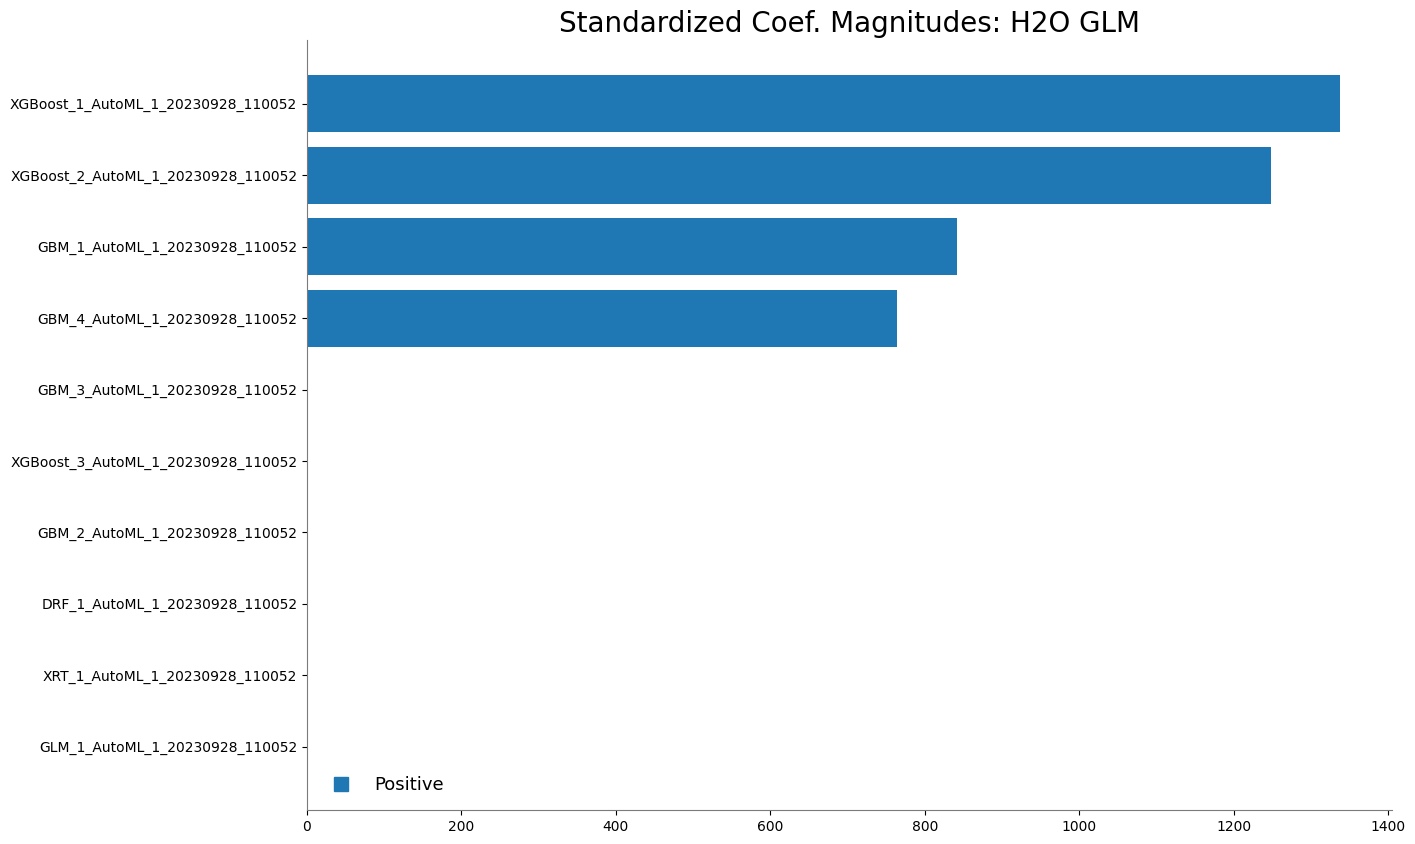

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230928_110052
StackedEnsemble_AllModels_1_AutoML_1_20230928_110052 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230928_110052
StackedEnsemble_BestOfFamily_1_AutoML_1_20230928_110052 - ERROR PLOTTING
Model ID: GBM_4_AutoML_1_20230928_110052


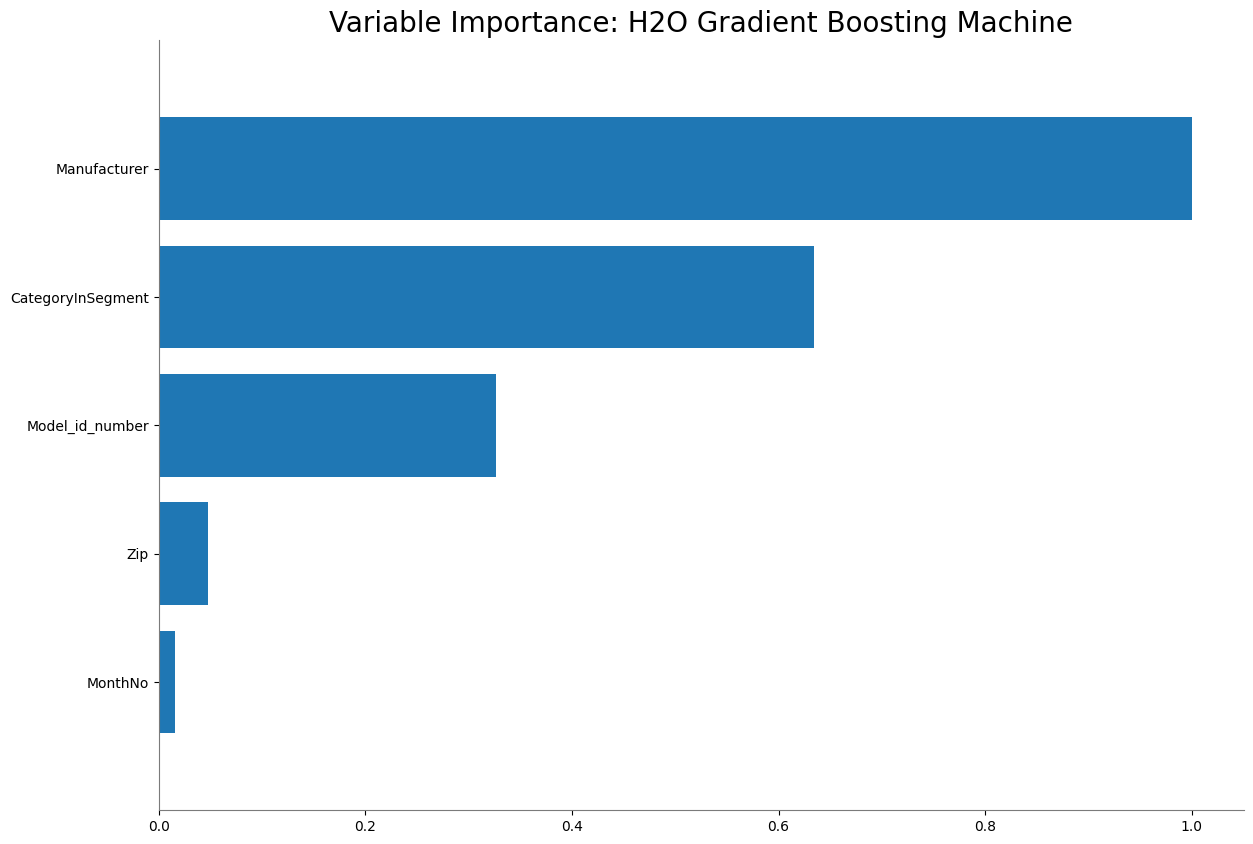

Model ID: XGBoost_1_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

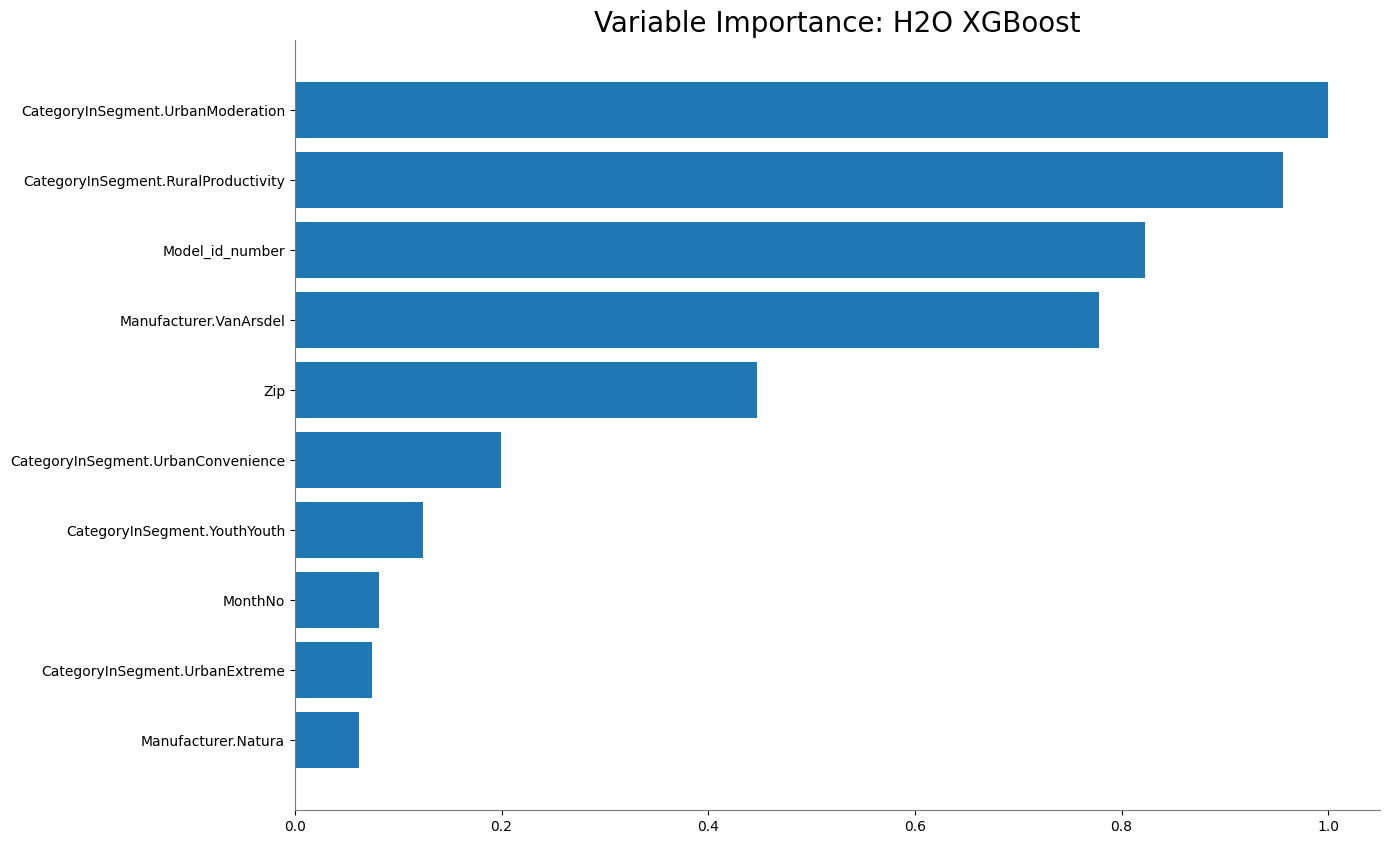

Model ID: XGBoost_2_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

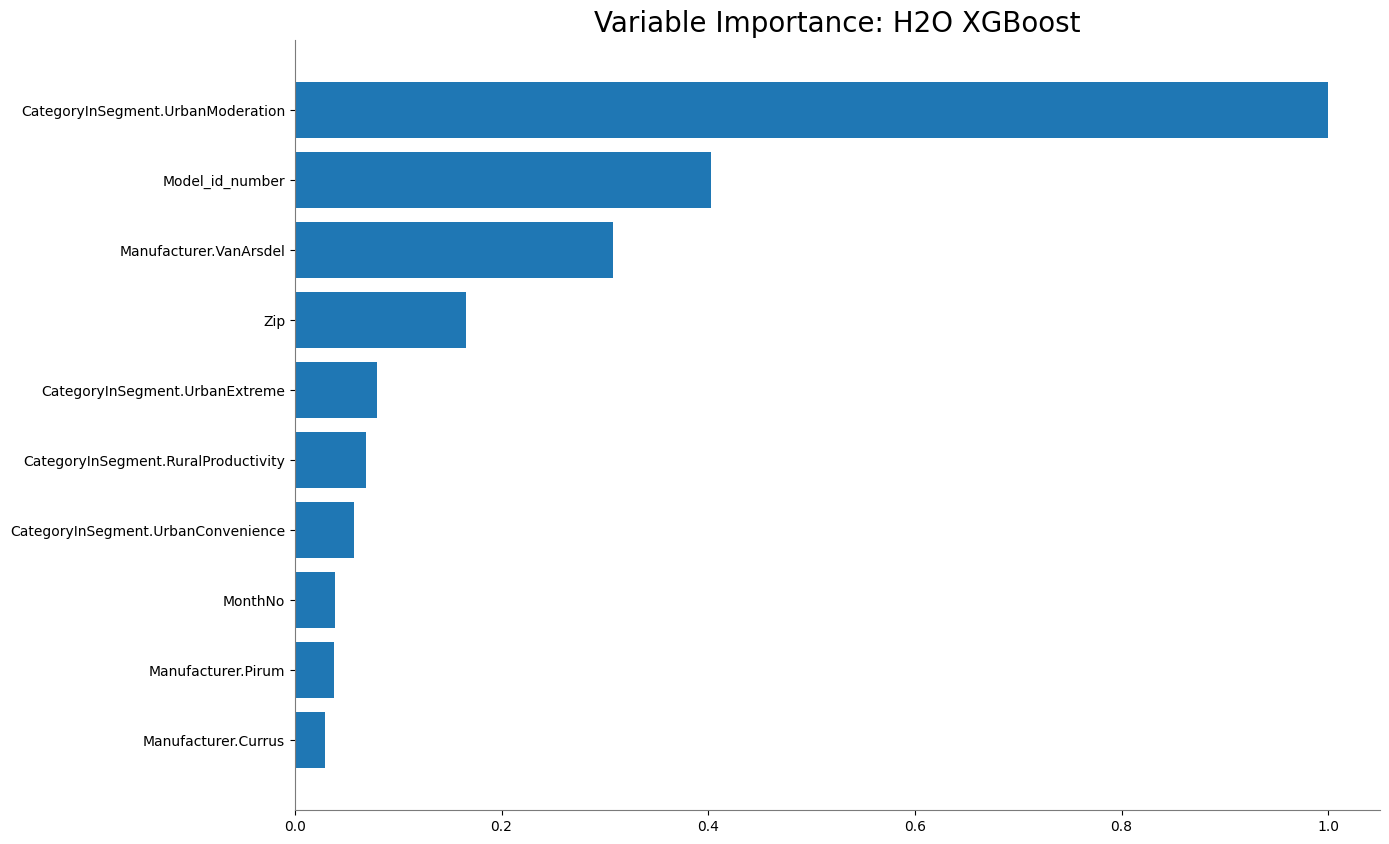

Model ID: GBM_1_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

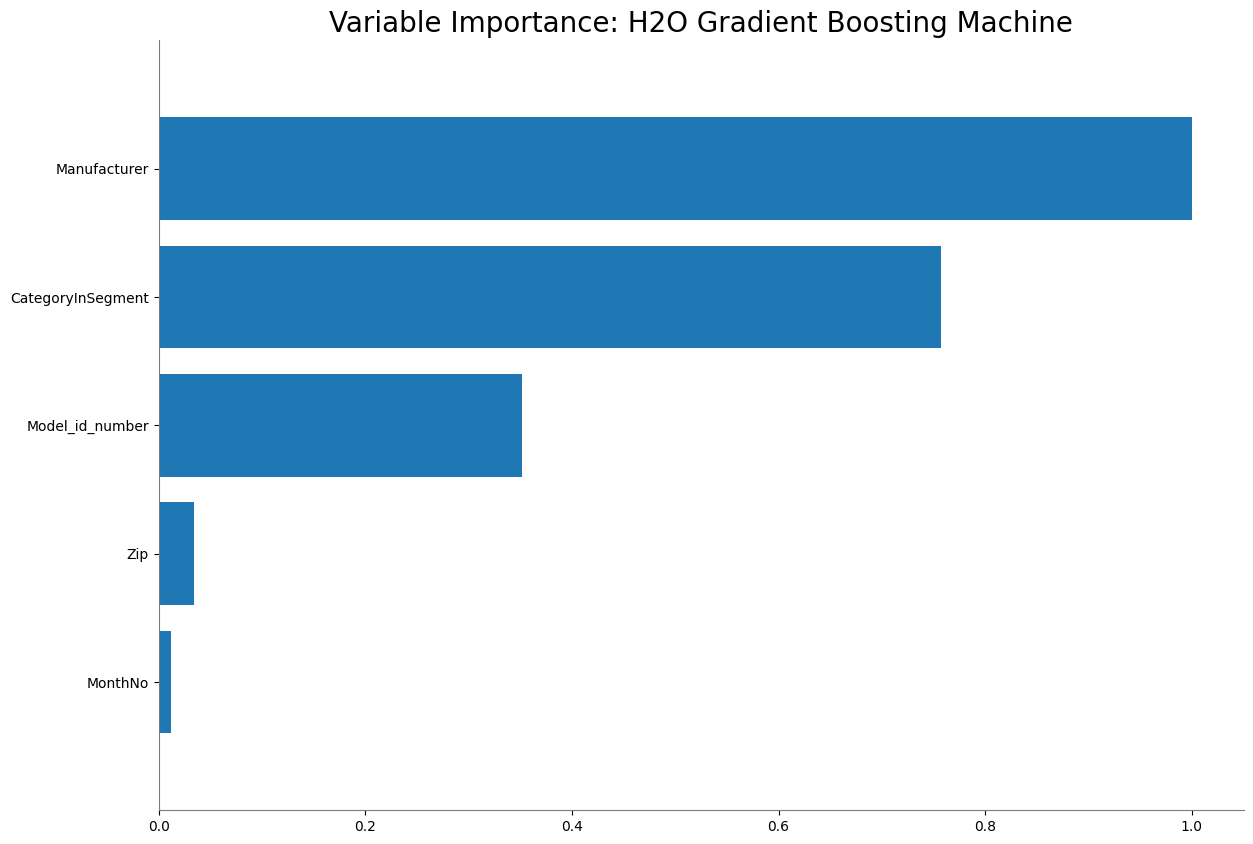

Model ID: GBM_3_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

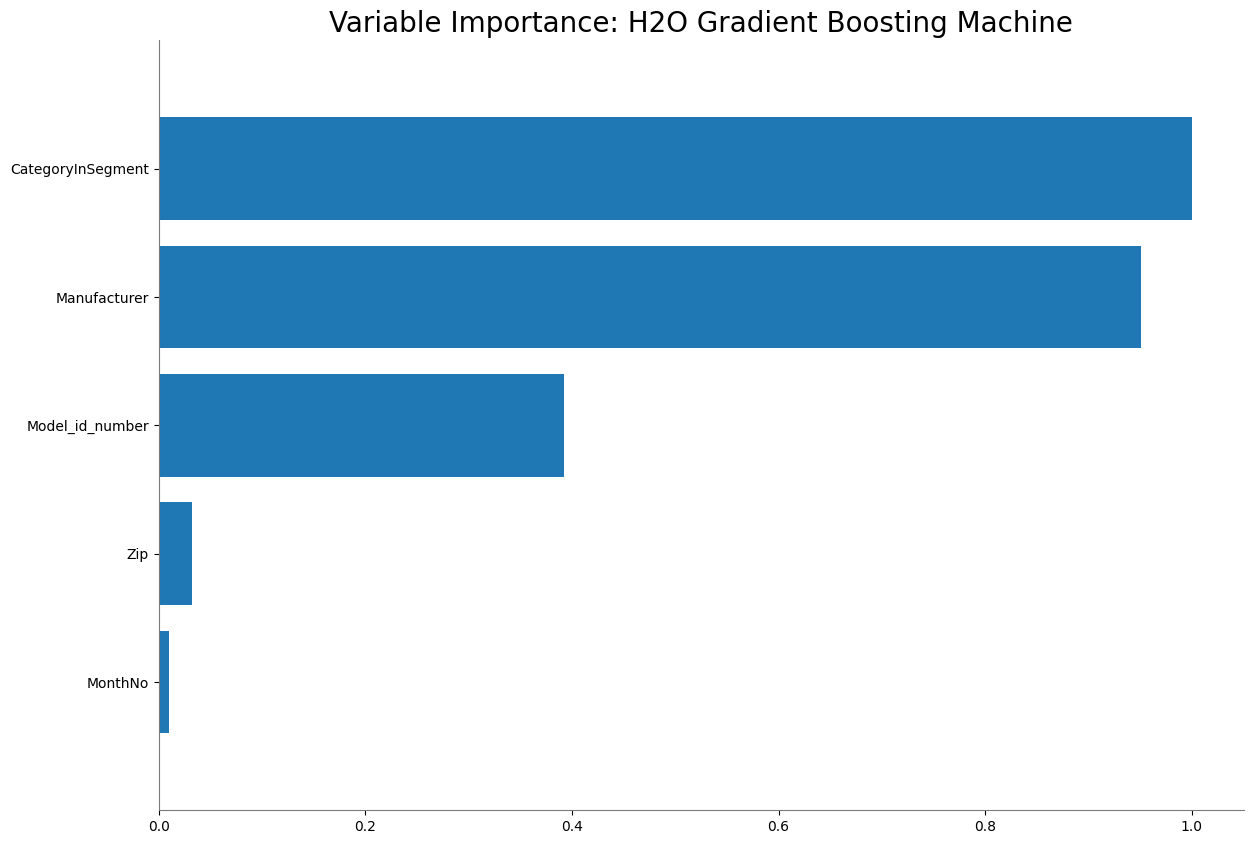

Model ID: XGBoost_3_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

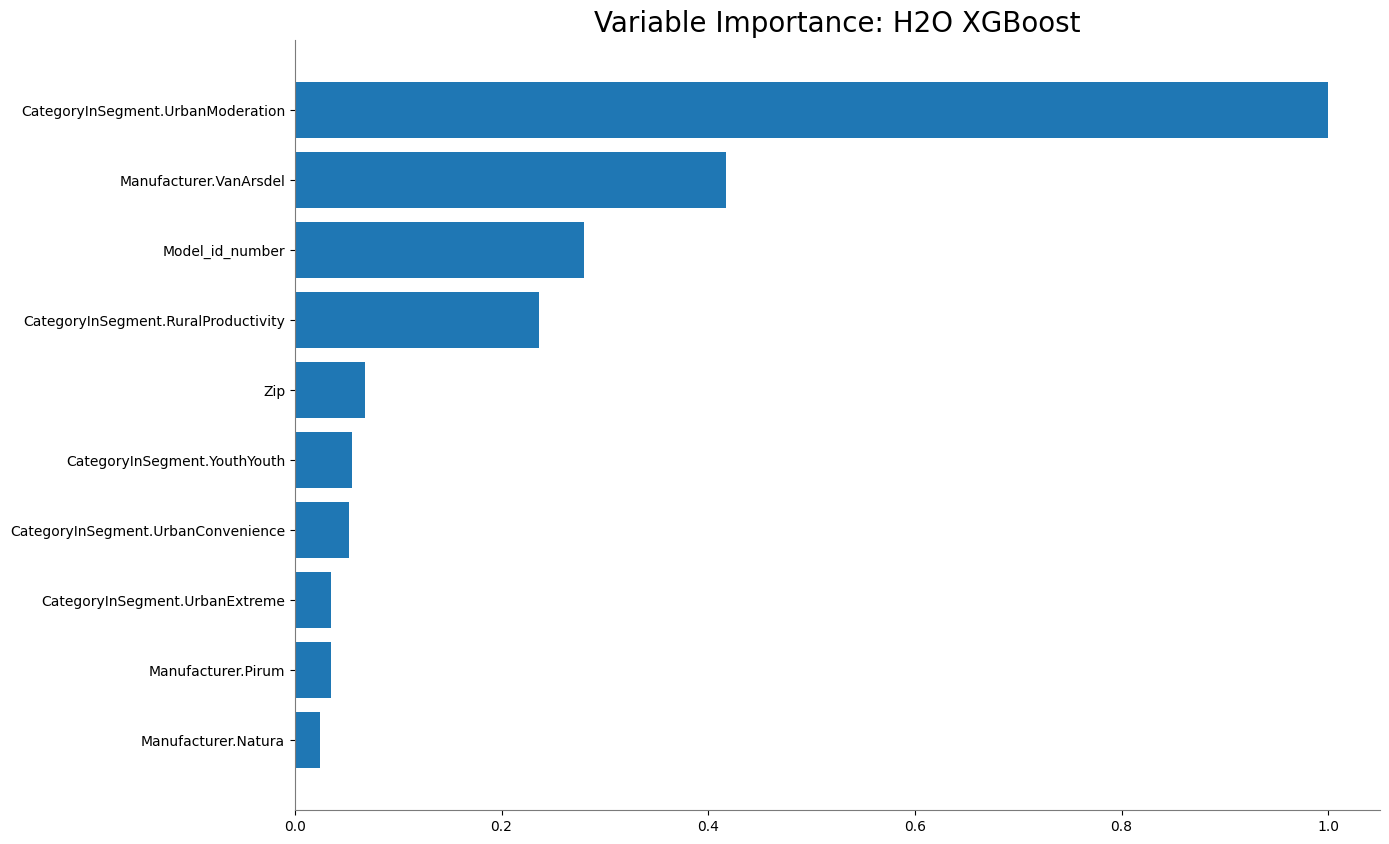

Model ID: GBM_2_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

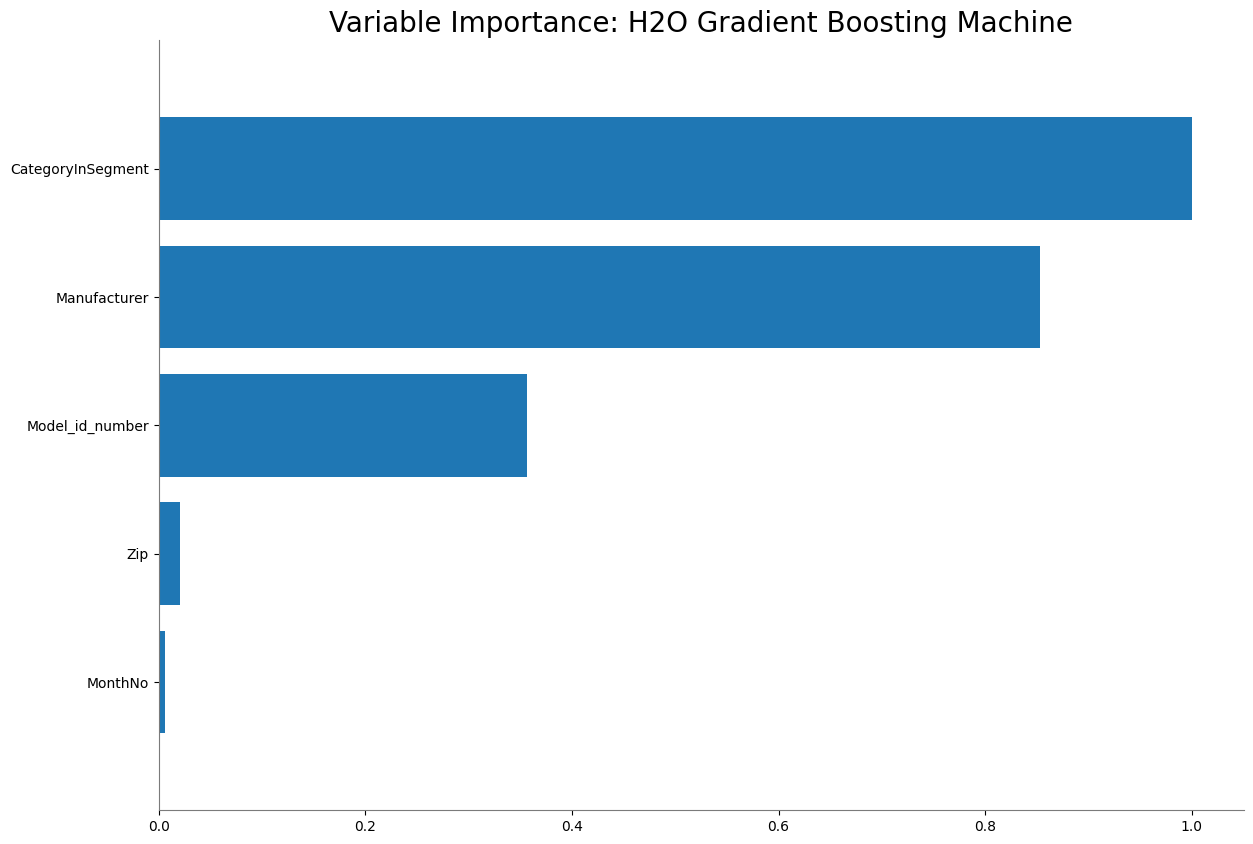

Model ID: DRF_1_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

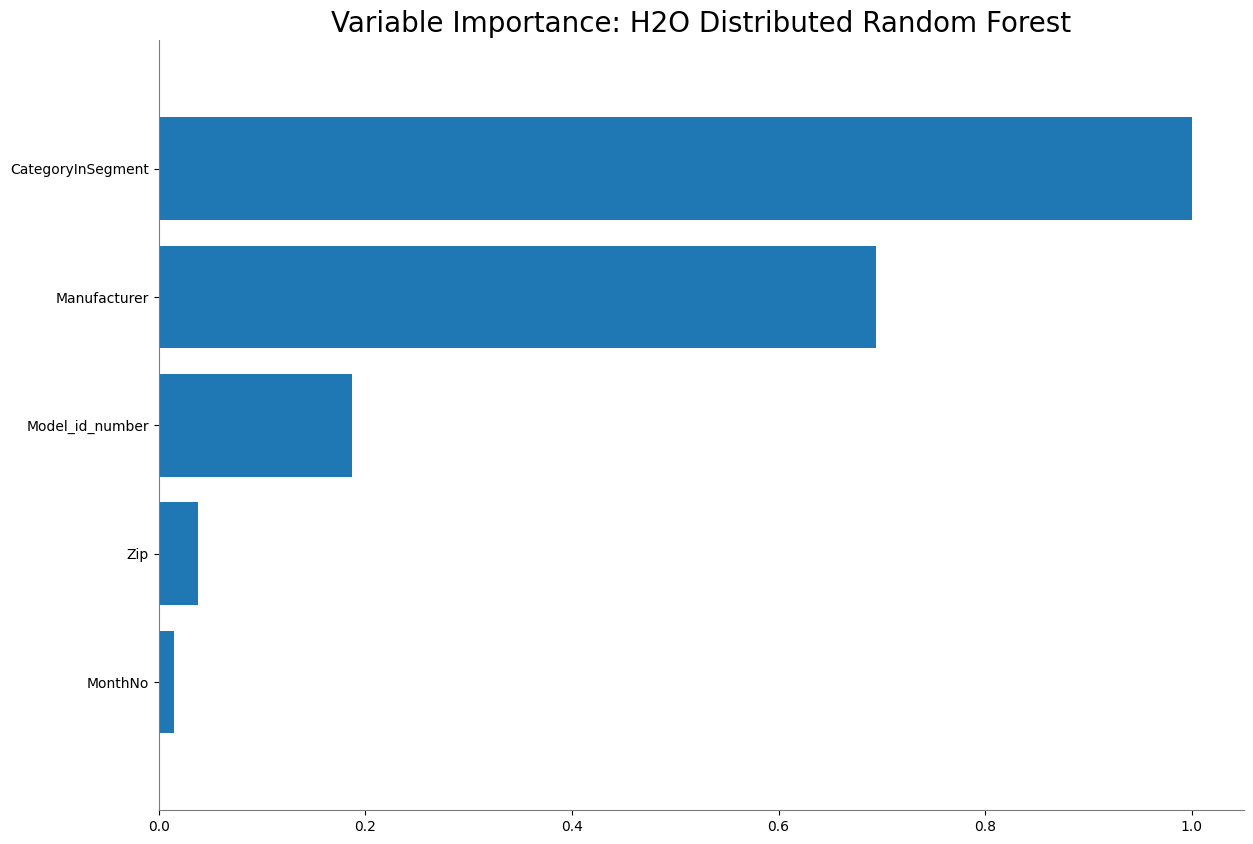

Model ID: XRT_1_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

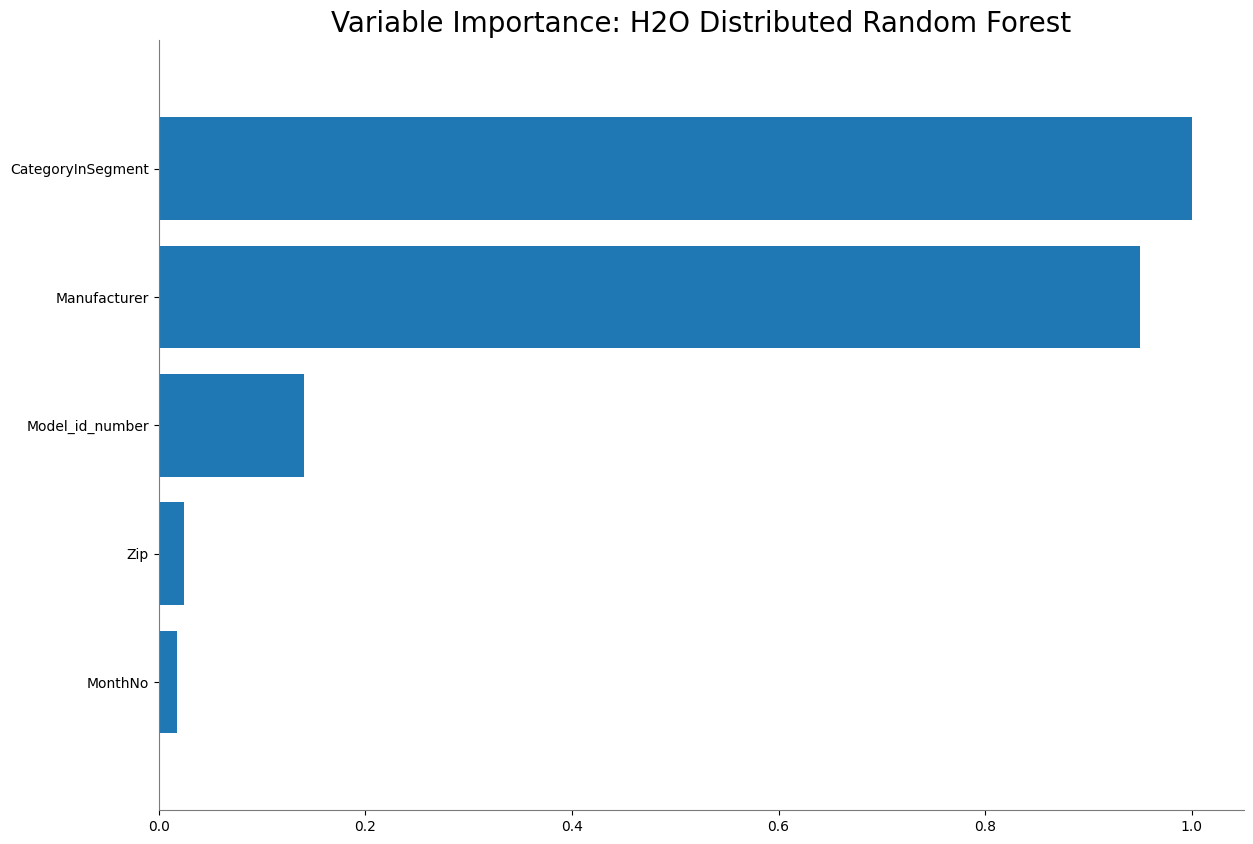

Model ID: GLM_1_AutoML_1_20230928_110052


<Figure size 640x480 with 0 Axes>

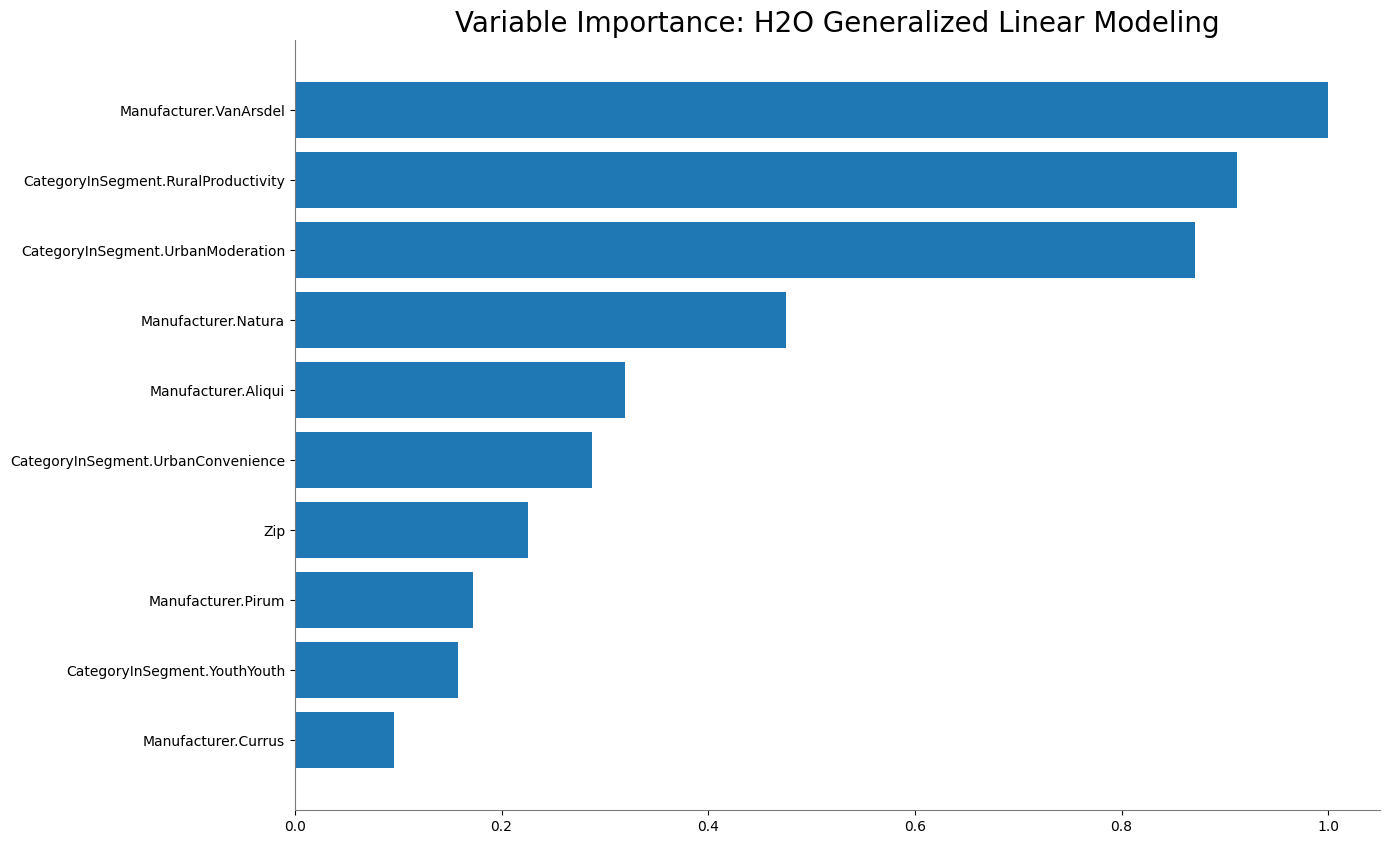

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Revenue_T'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230928_110052
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4104603.5413505966
RMSE: 2025.9821177272509
MAE: 490.7483013808163
RMSLE: NaN
Mean Residual Deviance: 4104603.5413505966
R^2: 0.8111951791074261
Null degrees of freedom: 145380
Residual degrees of freedom: 145376
Null deviance: 3160574782968.5728
Residual deviance: 596731367445.0911
AIC: 2626391.9878329
R2 cross validation: 0.7772505829760267
R2 test validation: 0.8111951791074261
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.7679354746153535
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230928_110052
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4135426.1751022204
RMSE: 2033.5747281824242
MAE: 501.47383098460733
RMSLE: NaN
Mean Residual Deviance: 4135426.1751022204
R^2: 0.8097773900843728
N

# Графии кривых обучения

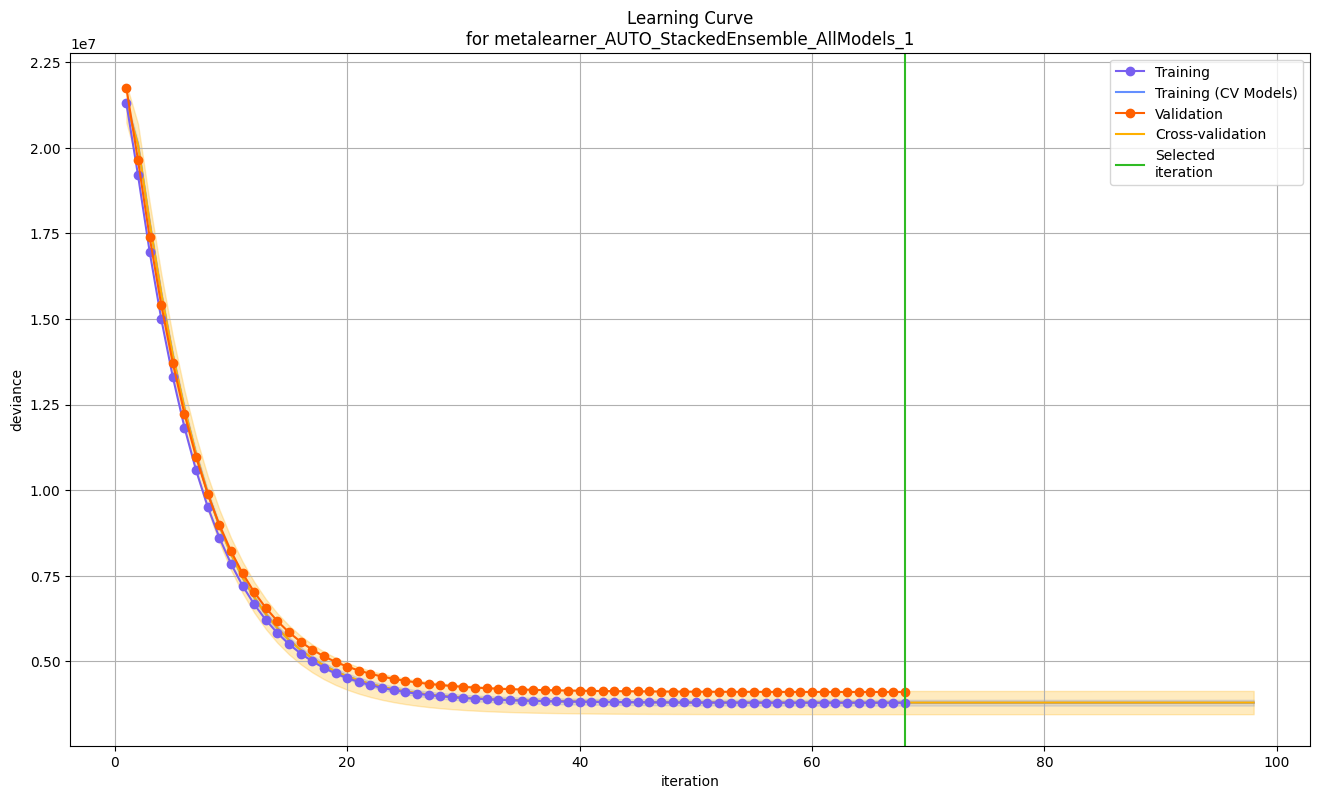

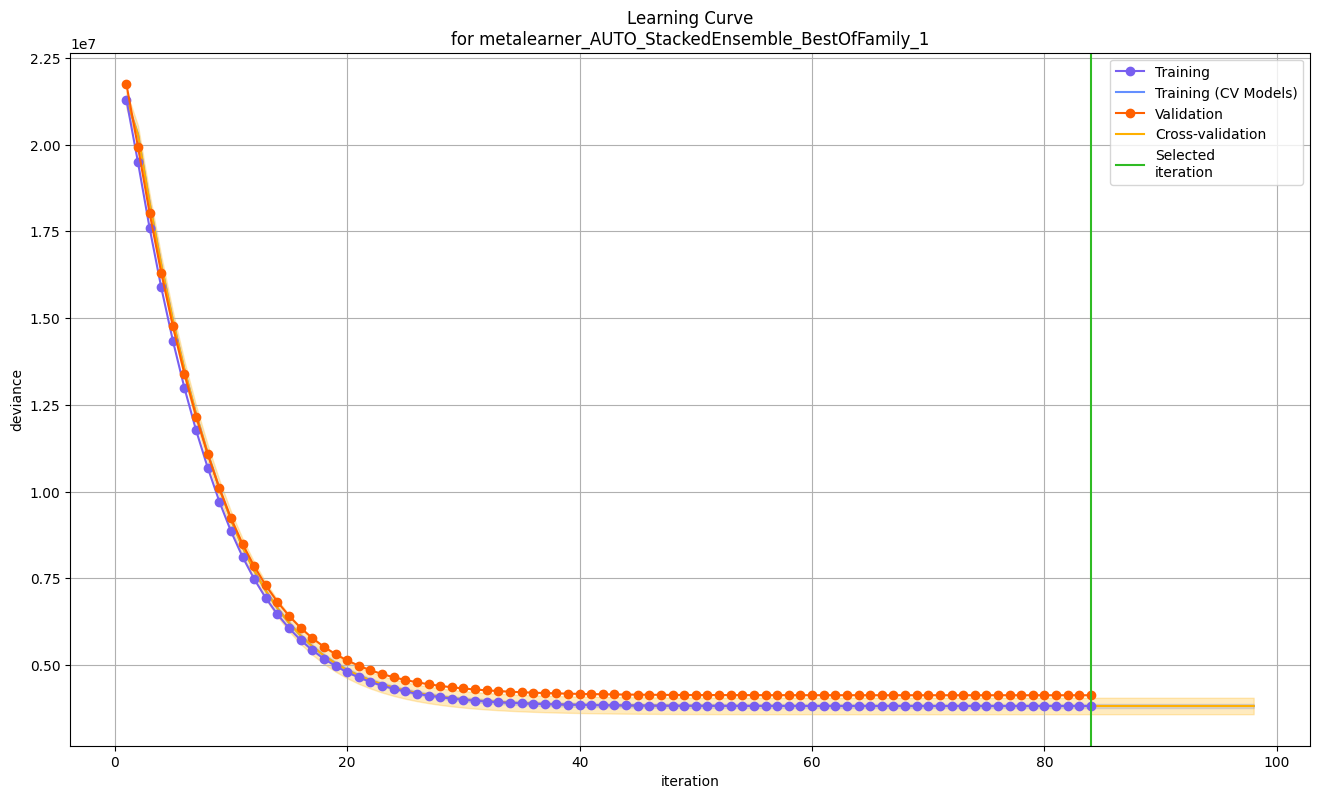

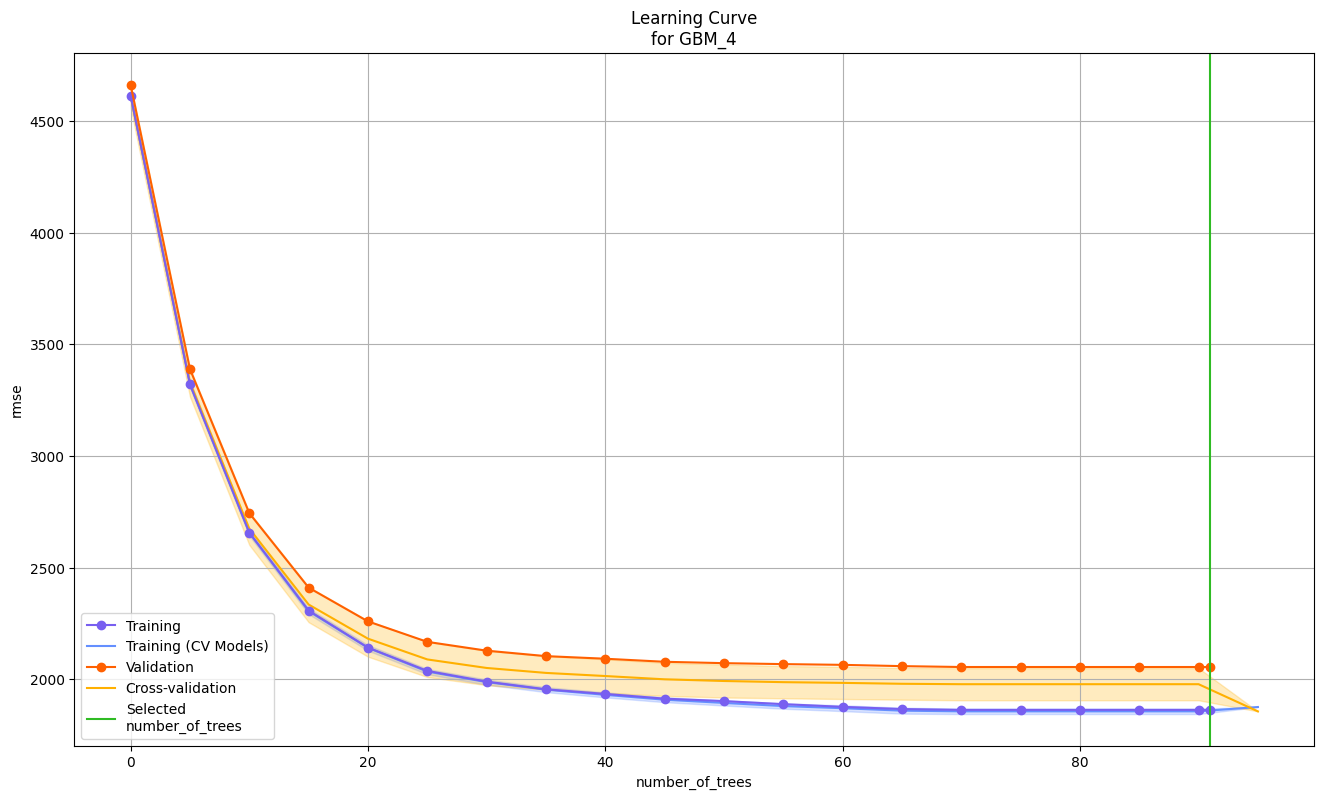

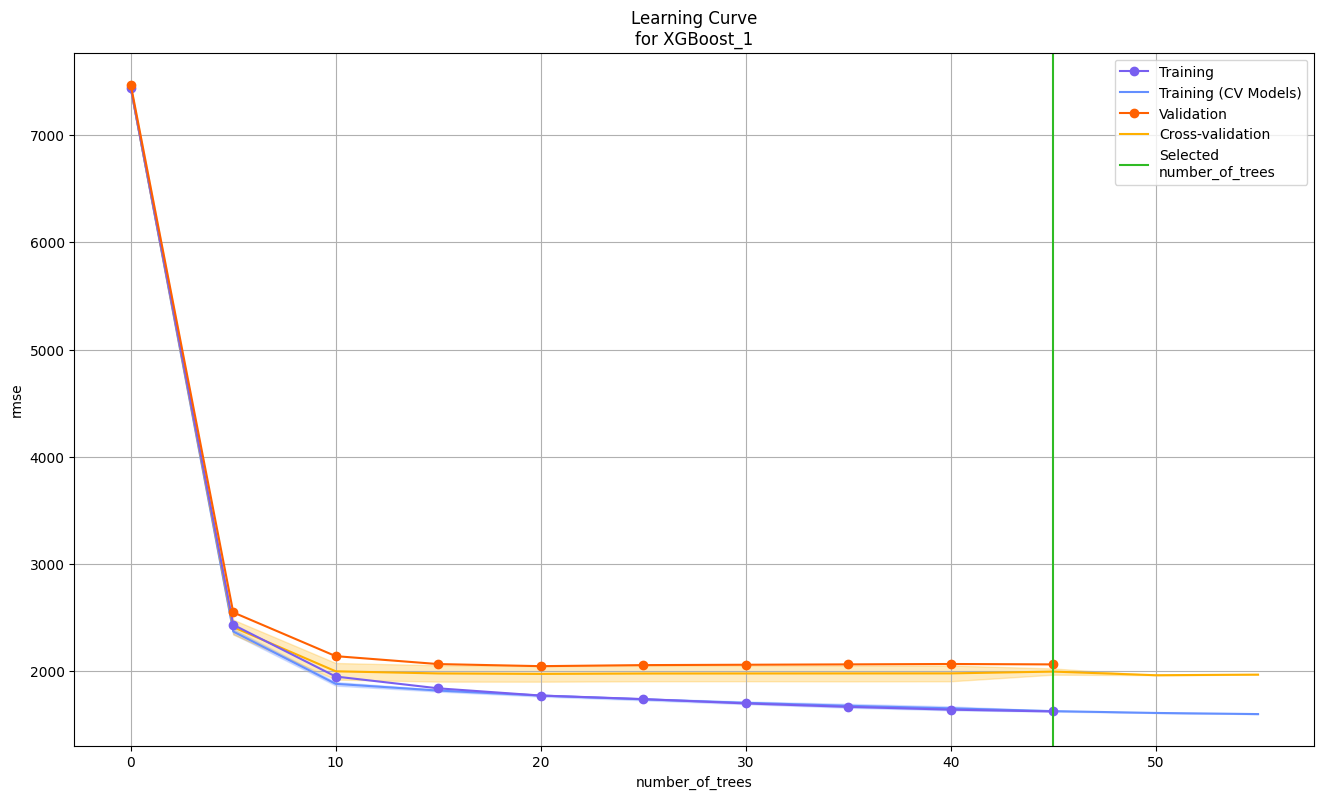

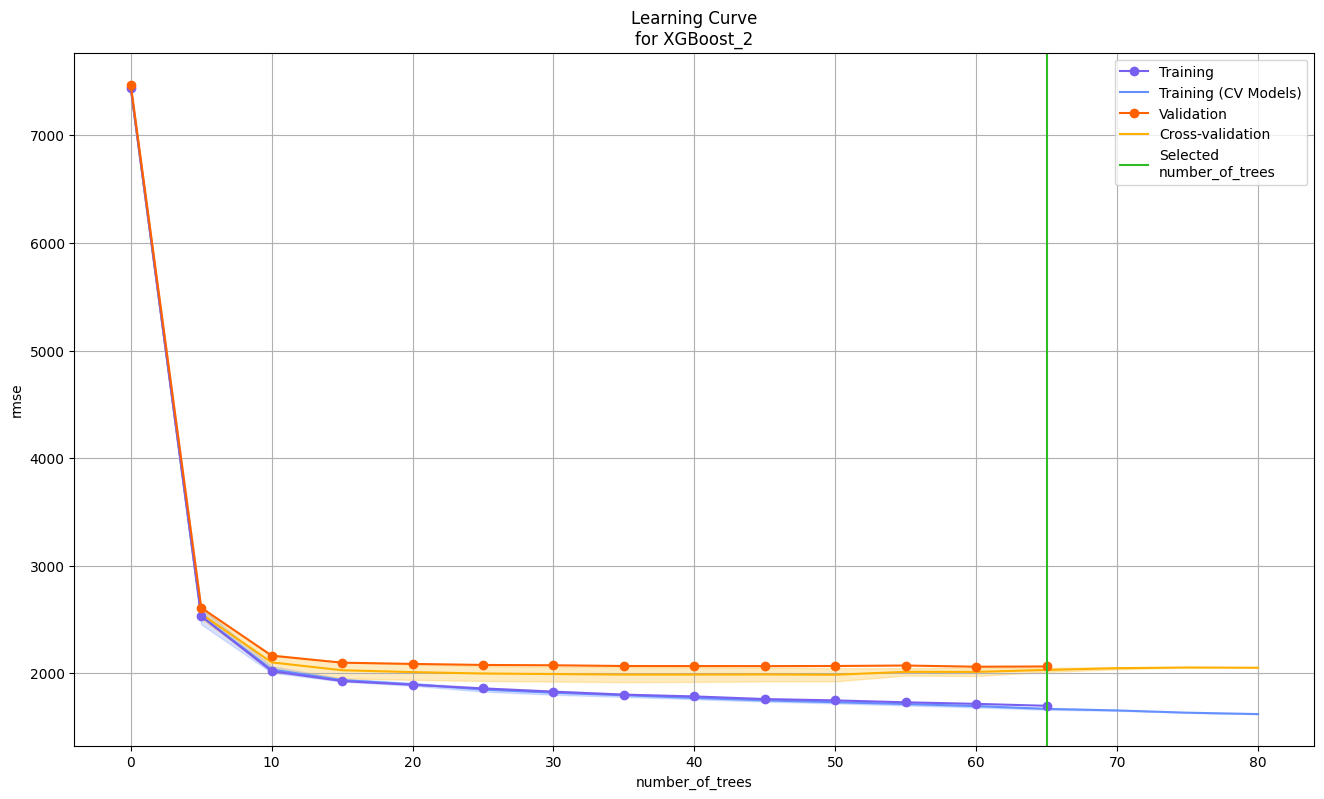

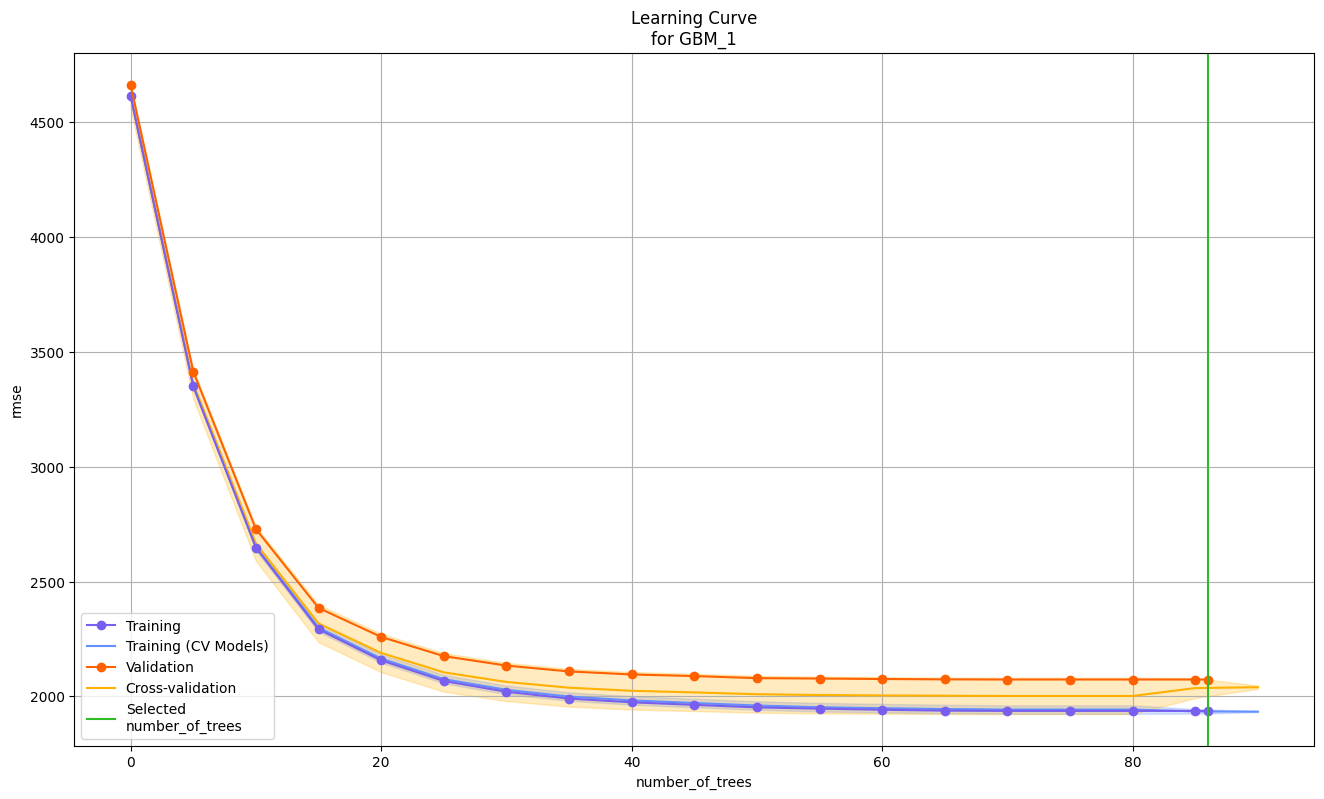

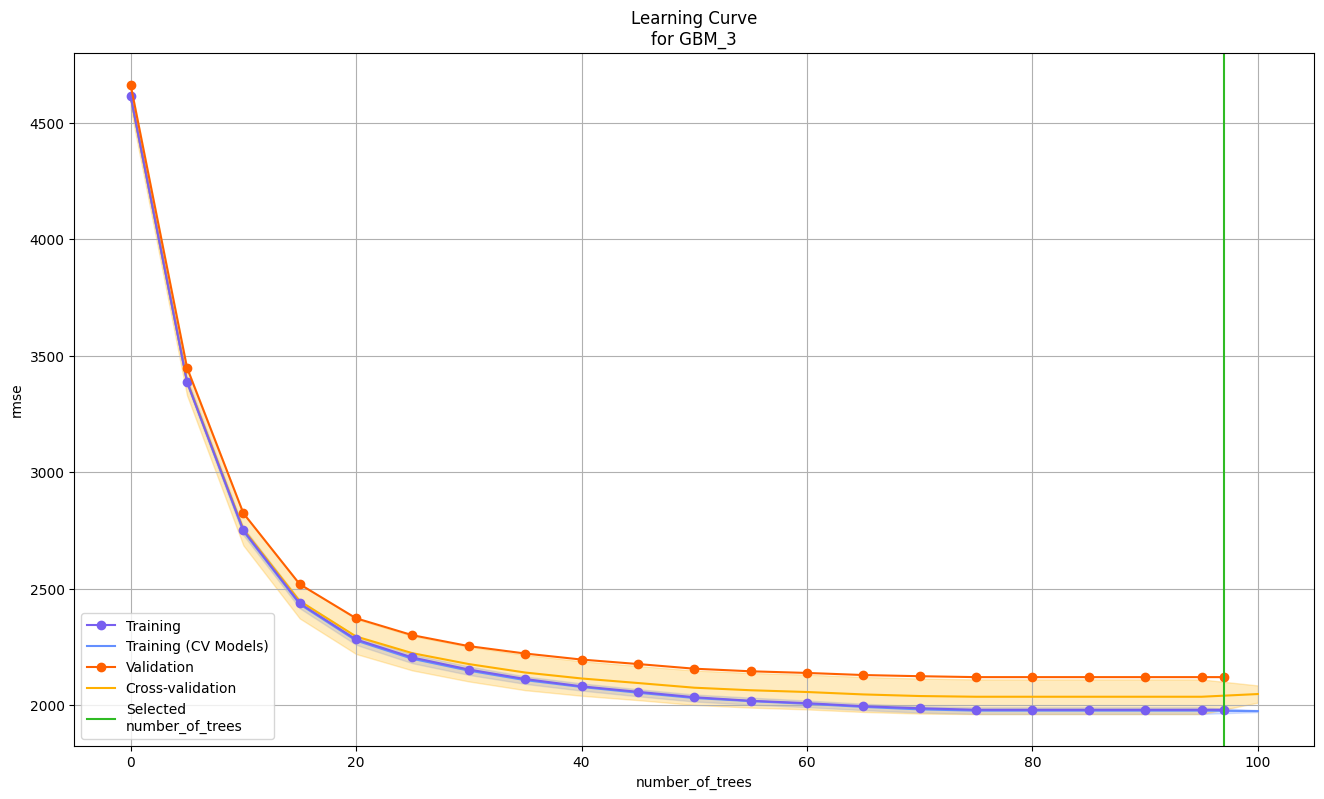

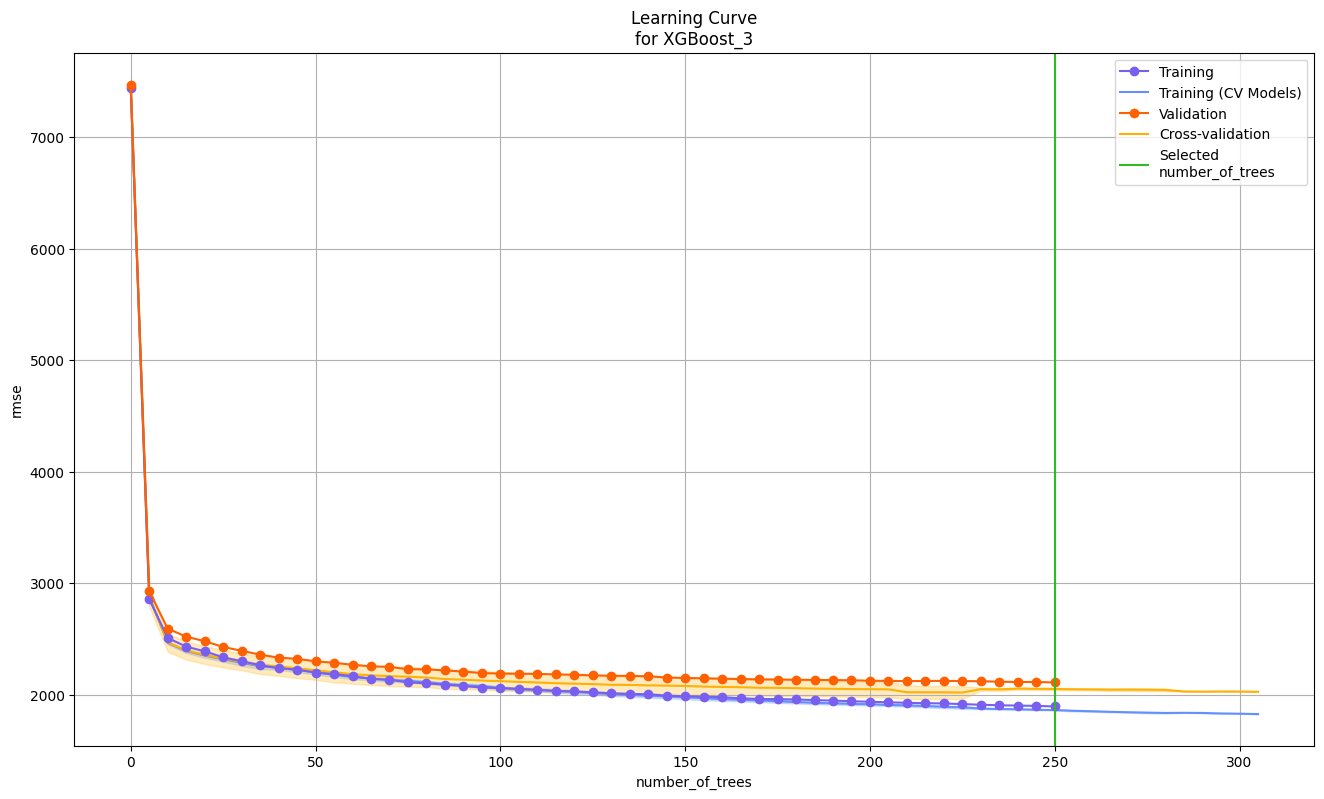

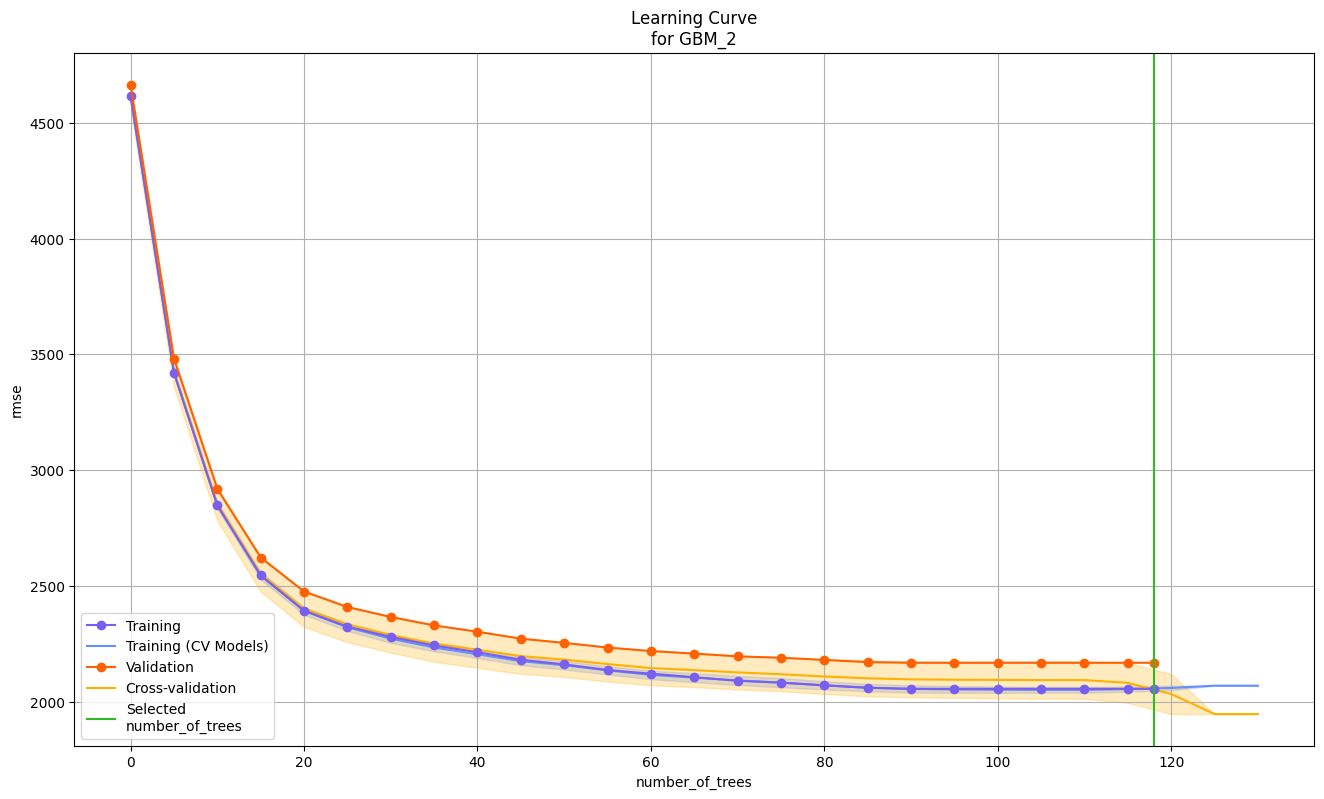

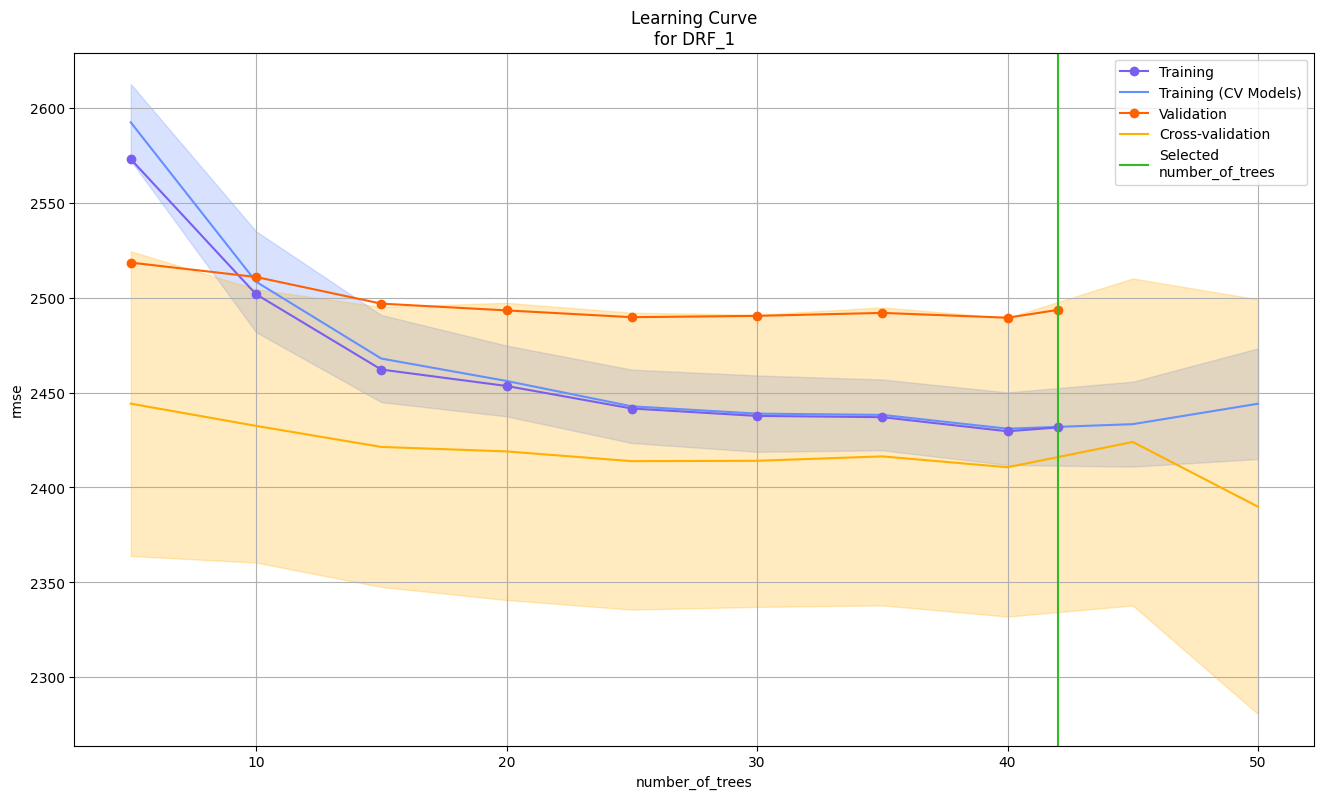

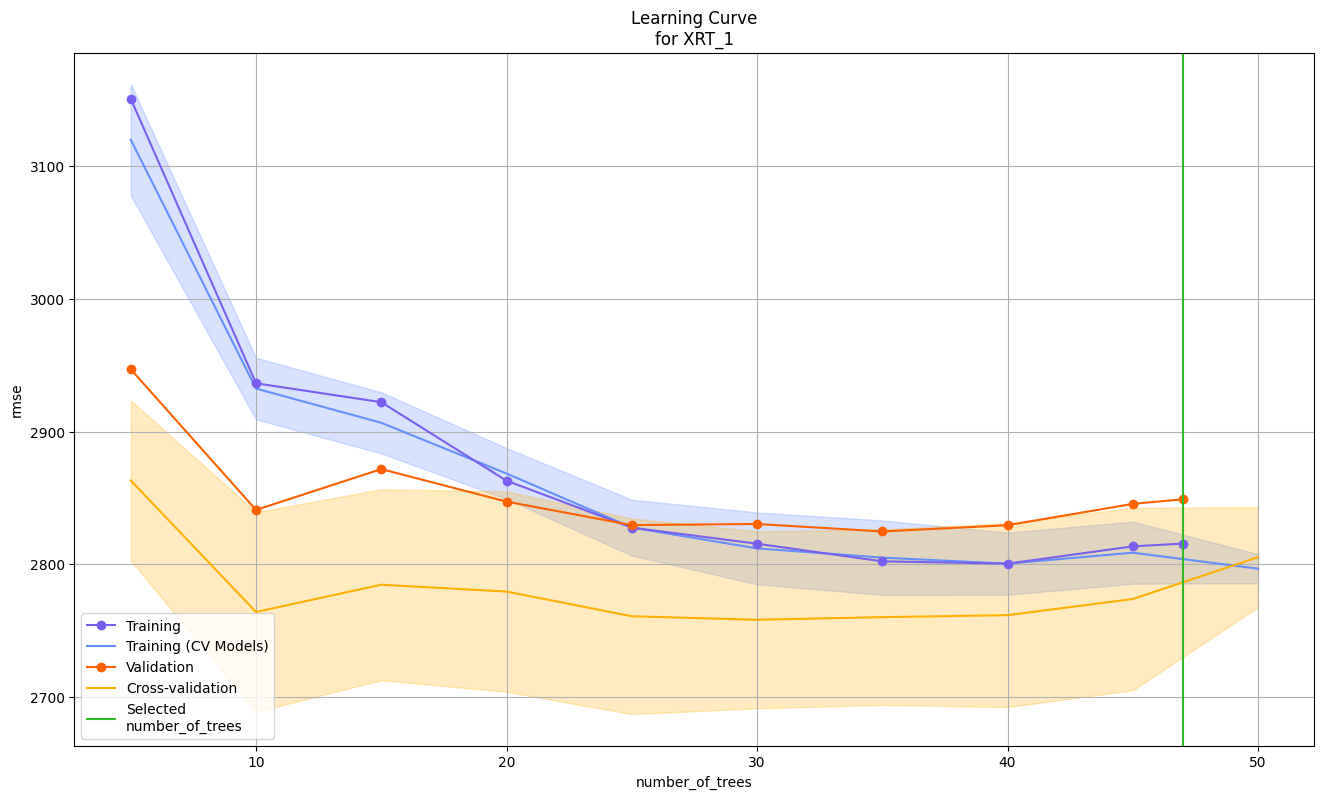

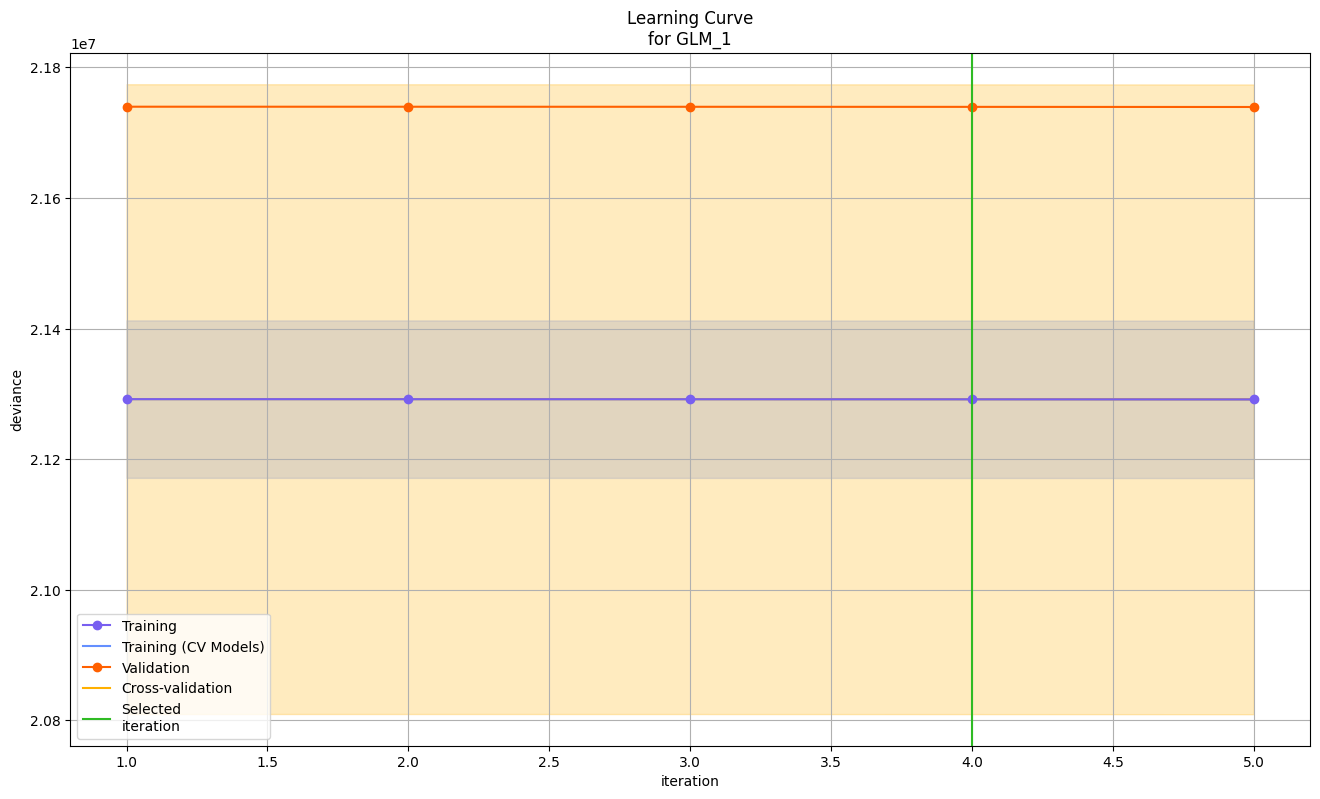

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [18]:
#besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [19]:
# Сохранение лучшей модели
#besy_model = h2o.get_model(besy_model_id)
#h2o.save_model(besy_model, path = "./models")